In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread(r'C:\Users\LENOVO\OneDrive\Desktop\miranda\b.png')        # read color image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
rows, cols, ch = img.shape

Manual Translation

In [3]:
def translate_image(image, tx, ty):
    rows, cols, ch = image.shape
    result = np.zeros_like(image)  # create blank image
    for y in range(rows):
        for x in range(cols):
            new_x = x + tx
            new_y = y + ty
            if 0 <= new_x < cols and 0 <= new_y < rows:
                result[new_y, new_x] = image[y, x]
    return result

Manual Scaling

In [4]:
def scale_image(image, sx, sy):
    rows, cols, ch = image.shape
    new_rows = int(rows * sy)
    new_cols = int(cols * sx)
    result = np.zeros((new_rows, new_cols, ch), dtype=np.uint8)
    for y in range(new_rows):
        for x in range(new_cols):
            src_x = int(x / sx)
            src_y = int(y / sy)
            if src_x < cols and src_y < rows:
                result[y, x] = image[src_y, src_x]
    return result

Manual Rotation

In [5]:
def rotate_image(image, angle_degrees):
    rows, cols, ch = image.shape
    angle = np.deg2rad(angle_degrees)
    center_x = cols // 2
    center_y = rows // 2

    result = np.zeros_like(image)
    for y in range(rows):
        for x in range(cols):
            # shift origin to center
            x_shift = x - center_x
            y_shift = y - center_y
            # rotation formula
            new_x = int(center_x + (x_shift * np.cos(angle) - y_shift * np.sin(angle)))
            new_y = int(center_y + (x_shift * np.sin(angle) + y_shift * np.cos(angle)))
            if 0 <= new_x < cols and 0 <= new_y < rows:
                result[new_y, new_x] = image[y, x]
    return result

Manual Shrinking (downsampling)

In [6]:
def shrink_image(image, factor):
    rows, cols, ch = image.shape
    new_rows = int(rows / factor)
    new_cols = int(cols / factor)
    result = np.zeros((new_rows, new_cols, ch), dtype=np.uint8)
    for y in range(new_rows):
        for x in range(new_cols):
            src_x = int(x * factor)
            src_y = int(y * factor)
            result[y, x] = image[src_y, src_x]
    return result

Manual Zooming (nearest neighbour)

In [7]:
def zoom_image(image, zoom_factor):
    rows, cols, ch = image.shape
    # crop center
    center_x, center_y = cols // 2, rows // 2
    radius_x, radius_y = int(cols / (2 * zoom_factor)), int(rows / (2 * zoom_factor))
    cropped = image[center_y - radius_y:center_y + radius_y,
                    center_x - radius_x:center_x + radius_x]

    new_rows, new_cols = rows, cols
    zoomed = np.zeros((new_rows, new_cols, ch), dtype=np.uint8)
    for y in range(new_rows):
        for x in range(new_cols):
            src_x = int(x / (new_cols / cropped.shape[1]))
            src_y = int(y / (new_rows / cropped.shape[0]))
            if src_x < cropped.shape[1] and src_y < cropped.shape[0]:
                zoomed[y, x] = cropped[src_y, src_x]
    return zoomed


In [8]:
#Apply transformations
translated = translate_image(img, 50, 30)
scaled = scale_image(img, 1.5, 1.5)
rotated = rotate_image(img, 45)
shrunk = shrink_image(img, 2)
zoomed = zoom_image(img, 1.5)

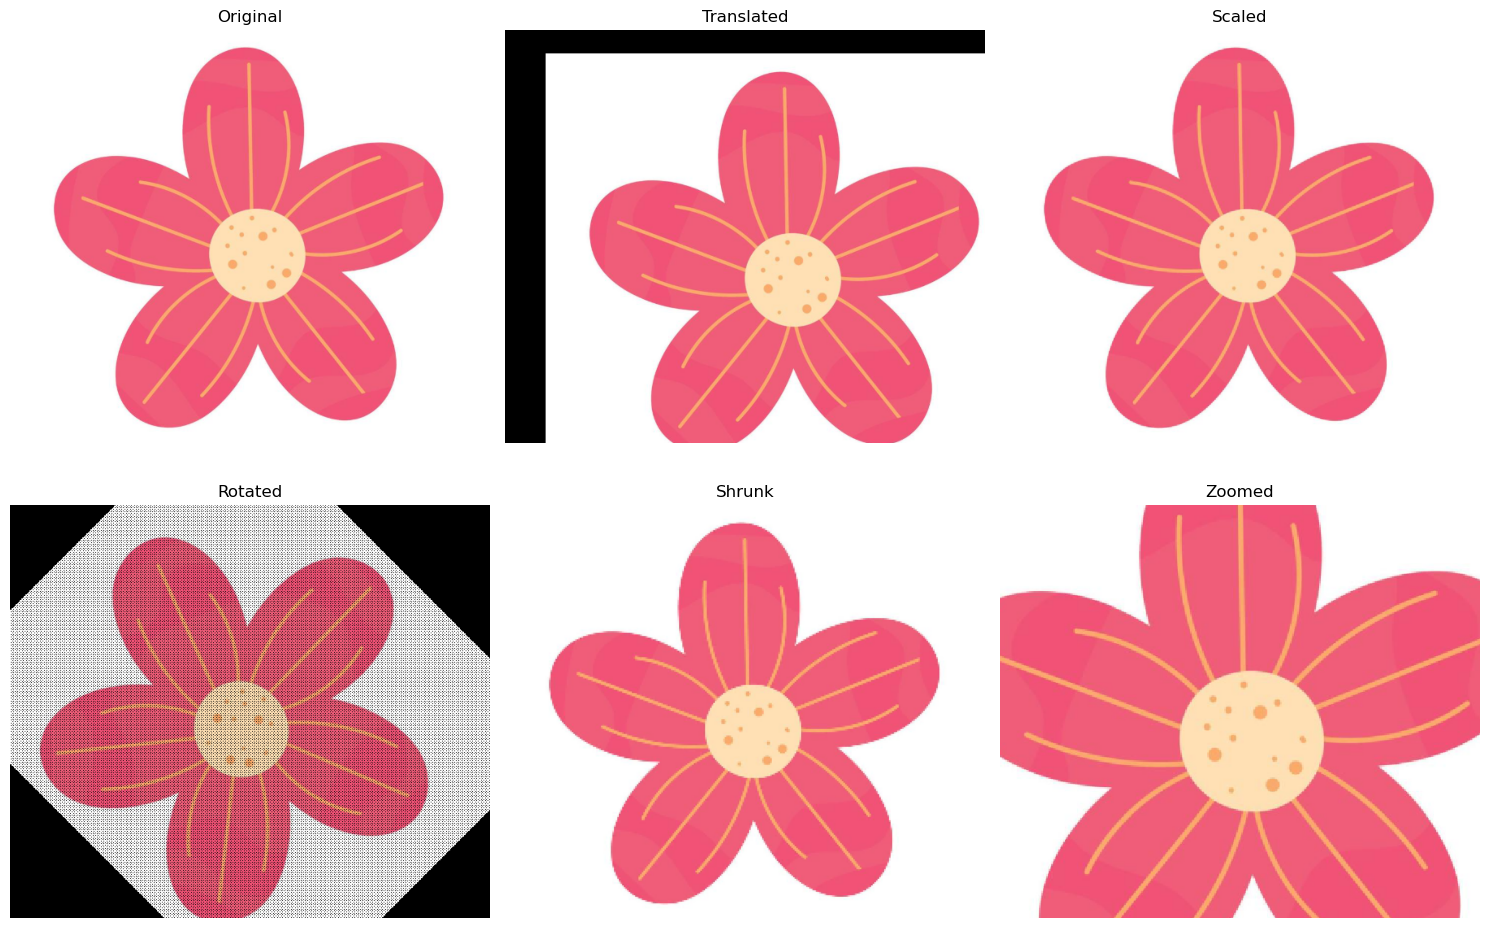

In [9]:
titles = ['Original', 'Translated', 'Scaled', 'Rotated', 'Shrunk', 'Zoomed']
images = [img, translated, scaled, rotated, shrunk, zoomed]

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()